<a href="https://colab.research.google.com/github/tomaszjednorowski/Projects/blob/main/Wykrywanie_zespo%C5%82%C3%B3w_QRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##$\large{1.\ Wstęp\ teoretyczny\ od\ strony\ medycznej}$

###Elektrokardiogram

Metoda przechwytu aktywności elektrycznej serca jest z nami od stu lat. Krzywa elektrokardiogramu opiera się na logicznym połączeniu każdego charakterystycznego zachowania rejestrowanego sygnału w dziedzinie czasu z odpowiednim zachowaniem danego elementu serca.

Ze względu na długoletnie praktyki w tym obszarze naukowcy opracowali już odpowiednie algorytmy czytania takiej krzywej i wyciągania z niej wniosków diagnostycznych. Patrząc na cały okres elektrokardiografii i oczywiście daleko młodszą od niej dziedzinę analizy komputerowej sygnału trudno się dziwić, że nadal w analizie elektrokardiogramu dominują meotdy mnemotechniczne. Poza nimi jednak ogromną wartość, także dla inżyniera biomedycznego stanowi dokładne określenie oczekiwanych wartości zapisu sygnału.

###Podstawy wiedzy o prawidłowych parametrach EKG

W toku pracy nad morfologią EKG wyprowadzono bardzo dokładne stosunki odcinków poszczególnych części krzywej, połączone z oczekiwanym przebiegiem czasowym (w milisekundach) co pozwala tu przytoczyć artykuł polskich lekarzy z GUMedu:



Krzywa EKG musi być opisana wg następujących parametrów, zgodnie z ich poniższą charakterystyką:

	1. Określenie cechy i szybkości przesuwu papieru.
		a. Gdy brak informacji, określamy jakościowo na podstawie stosunku QT do QRS.
	2. Ocena załamków, odcinków i odstępów (odstęp to załamek i odcinek razem wzięte) P, PR, QRS, ST, T QT + QTc.
		a. Załamki i odstępy:
			i. Załamek P
				1) Wysokość prawidłowego załamka P - w odprowadzeniach kończynowych <0,25 mV (2,5 mm)
				2) W odprowadzeniach przedsercowych < 0,15mV (1,5 mm)
				3) Szerokość <120 ms
				4) Oś +30 do +70 deg.
			ii. Załamek PQ (PR)
				1) Odstęp P mierzy się od początku P do początku QRS. To czas od początku depolaryzacji przedsionka do początku depolaryzacji mięśniówki komór.
				2) Prawidłowy czas trwania tego odcinka to:
					a) (dzieci 100-120 ms)
					b) młodzież 120-160 ms
					c) Dorośli 140-200 ms
			iii. Odcinek PQ (PR)
				1) Odcinek ten mierzy się od końca załamka P do początku QRS. Jego położenie interpretuje się według odcinka TP.
				2) Obniżenie PQ(PR) >=0,08 mV.
	3. Rytm i jego zaburzenia
	4. Oś serca.
	5. Zaburzenia przewodnictwa - bloki.
	6. Przerosty przedsionków i komór, jeśli są (każde z osobna (w sumie 4) wymaga osobnej uwagi i opisu.
	7. Zawał serca świeży lub przebyty.
	8. Niedokrwienie miokardium
	9. Ocena czynności stymulatora
	10. OT i Otc


##$\large{2.\ Wstęp\  teoretyczny\  od\  strony\  technicznej}$

Celem opracowania wyników EKG używa się transformacji falkowej. Transformacja ta jest metodą czasowo-częstotliwościowej analizy sygnału i jest szczególnie atrakcyjna jako alternatywa dla transformaty Fouriera gdy mamy do czynienia z analizą sygnału niestacjonarnego, o widmie zmiennym w czasie.

W transformacie falkowej kluczowa jest funkcja jądra $\psi(t)$ determinująca zbiór funkcjji (rodzinę falek), które pochodzą od falki matki, czyli jądra funkcji.
 \begin
 \begin{equation}\huge\int_{-\infty}^{+\infty}\color{yellow}{ \Psi(t)} dt = 0
 \end{equation}


 $\Psi(t) \in L^2 (R)$



Kolorem $\color{yellow}{żółtym}$ wyróżniono falkę matkę. Cała reszta funkcja w sensie formalnym różni się jedynie skalowaniem i przesuwaniem tego jądra funkcji.

Norma ($\equiv E_{falki}$) określona jest z góry jako jednostkowa i spełniająca warunek dopuszczalności.

$\forall \parallel \Psi \parallel = 1 \to \parallel \Psi_{\tau,s}\parallel = 1$

Gdzie $\tau$ i s to są współczynniki kolejno przesunięcia i skali.

Jest to więc normalizacja funkcji, która implikuje normalizację każdego atomu falkowego.

Całą rodzinę falek definiuje zaś równanie:

$\Psi_{\tau,s}(t) = \frac{1}{\sqrt{s}}\Psi(\frac{t-\tau}{s}), s>0$



Mając do czynienia z sygnałem dyskretnym stajemy przed potrzebą użycia decymacji przy analizie falkowej, czyli zmniejszenia częstotliwości próbkowania poprzez wybór co n-tej próbki sygnału. 




Zadanie znalezienia częstości rytmu pracy serca sprowadza się do odpowiedniego wykorzystania analizy falkowej, której jednym z narzędzi jest funkcja skalująca. Ta funkcja jest w stanie przekształcić sygnał EKG uwypuklając zespół QRS kosztem innych elementów zapisu elektrokardiogramu. Jest to jednak koszt dla nas akceptowalny, zważywszy na cel ćwiczenia - wyznaczenie częstości rytmu serca.

Następnie używa się wyspecjalizowanej biblioteki języka Python, której cel to wyszczególnienie zespołów QRS, o nazwie ecgdetektors. 



##$\large{3.\ Propozycja\ rozwiązania\ problemu}$ 

In [ ]:
import matplotlib.pyplot as plt
import pywt
from pandas import read_csv
import pandas as pd

In [ ]:
z = pd.read_csv("808.csv")

In [ ]:
z.columns= ["sample_interval","ECG1", "ECG2"]
z = z.drop(labels=0)
x= pd.to_numeric(z.ECG1)

In [ ]:
c = x[:512]

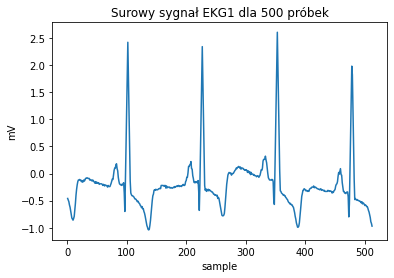

In [ ]:
plt.title("Surowy sygnał EKG1 dla 500 próbek") 
plt.plot(c) 
plt.xlabel("sample")
plt.ylabel("mV")
plt.show()

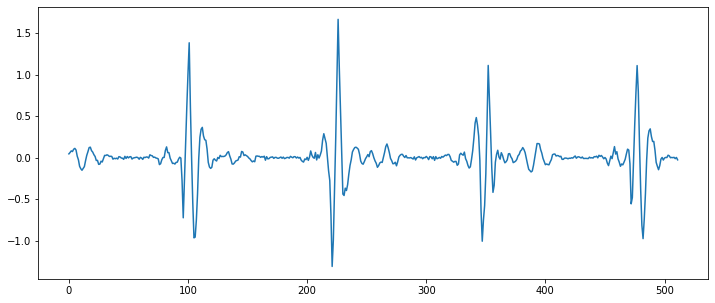

In [ ]:
v = pywt.wavedec(c, "db4", level=5)
v[0] = v[0]*0
v[1] = v[1]*0
v[2] = v[2]*0
#v[3]=v[3]*0

s = pywt.waverec(v, 'db4')
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(s)

[105, 226, 351, 481]

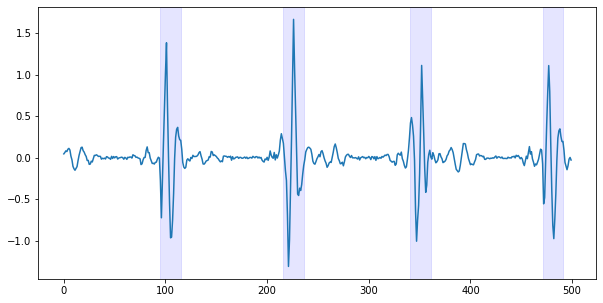

In [ ]:
!pip install py-ecg-detectors
fs=200
from ecgdetectors import Detectors
detectors = Detectors(fs)
qrs = detectors.swt_detector(s)
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(s[:500])
for peak in qrs:
  ax.axvspan(xmin=peak-10, xmax = peak+10, color ='b', alpha = 0.1)
qrs

In [ ]:
v = pywt.wavedec(x, "db4", level=5)
v[0]= v[0]*0
v[1]=v[1]*0
v[2]=v[2]*0

s=pywt.waverec(v, 'db4')
qrs = detectors.swt_detector(s)
sec = 0.0078125
import numpy as np
qrs_time = np.asarray(qrs)*sec
qrs_time

array([8.20312500e-01, 1.76562500e+00, 2.74218750e+00, ...,
       1.79667188e+03, 1.79782031e+03, 1.79892969e+03])

In [ ]:
array = []
for i in range(len(qrs_time)):
  RR_intervals=60/(qrs_time[i] - qrs_time[i-1])
  array.append(RR_intervals)
heart_rate = np.mean(RR_intervals)
heart_rate

54.08450704225352

Wyznaczenie częstości rytmu serca w czasie:

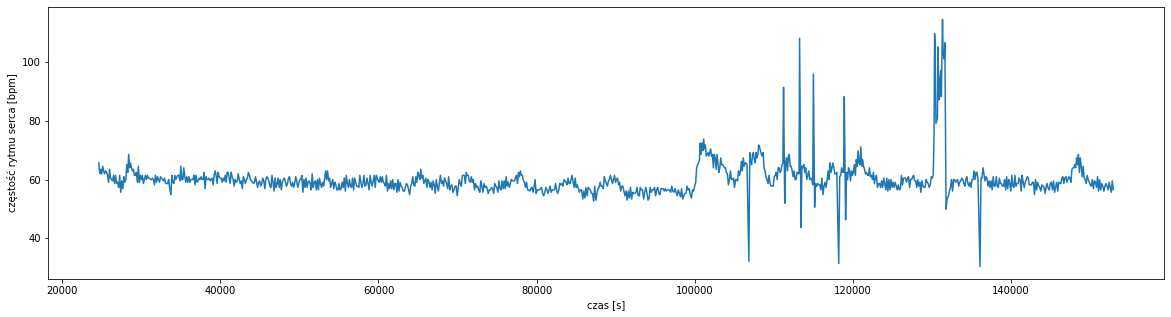

In [ ]:
plt.figure(figsize=(20,5))
y = array[200:1200]
x= qrs[200:1200]
plt.xlabel("czas [s]")
plt.ylabel("częstość rytmu serca [bpm]")
plt.plot(x,y)

In [ ]:
frame = pd.read_csv("808test.csv", delim_whitespace=True )
frame.head(5)

,Time,Sample,#,Type,Sub,Chan,Num,Aux
0,0:00.758,97,N,0,0,0,NaN,NaN
1,0:01.734,222,N,0,0,0,NaN,NaN
2,0:02.719,348,N,0,0,0,NaN,NaN
3,0:03.695,473,N,0,0,0,NaN,NaN
4,0:04.672,598,N,0,0,0,NaN,NaN


Sprawdzenie poprawności:

In [ ]:
sample = list(frame.Sample)
sample[:5]

[97, 222, 348, 473, 598]

In [ ]:
qrs[:5]

[105, 226, 351, 481, 602]

Badanie drugiego sygnału - 826

In [ ]:
i = pd.read_csv("826.csv")

In [ ]:
i.columns= ["sample_interval","ECG1", "ECG2"]
i = i.drop(labels=0)
x= pd.to_numeric(i.ECG1)

In [ ]:
p = x[:512]

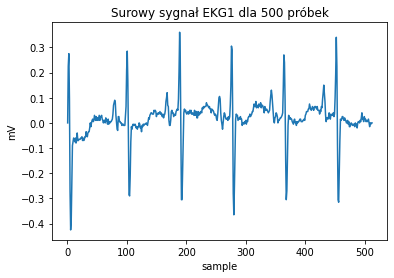

In [ ]:
plt.title("Surowy sygnał EKG1 dla 500 próbek") 
plt.plot(p) 
plt.xlabel("sample")
plt.ylabel("mV")
plt.show()

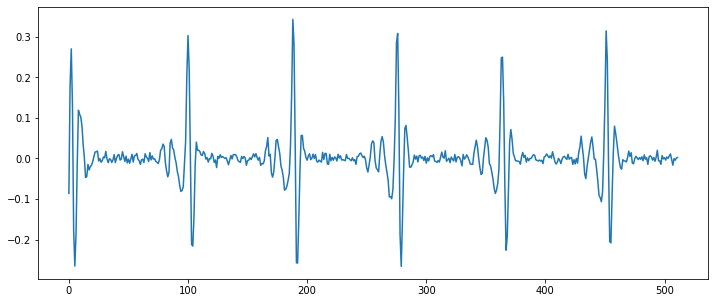

In [ ]:
w = pywt.wavedec(p, "db4", level=5)
w[0] = w[0]*0
w[1] = w[1]*0
w[2] = w[2]*0
#w[3]=w[3]*0

t = pywt.waverec(w, 'db4')
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(t)

[102, 191, 277, 366, 453]

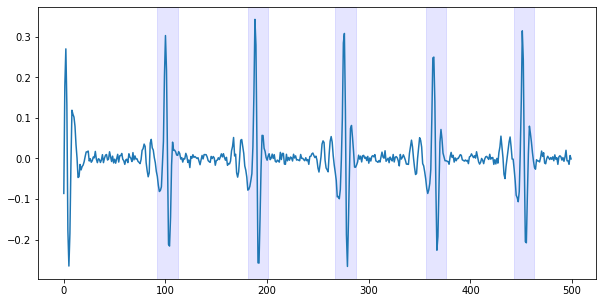

In [ ]:
!pip install py-ecg-detectors
fs=200
from ecgdetectors import Detectors
detectors = Detectors(fs)
qrs = detectors.swt_detector(t)
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(t[:500])
for peak in qrs:
  ax.axvspan(xmin=peak-10, xmax = peak+10, color ='b', alpha = 0.1)
qrs

In [ ]:
w = pywt.wavedec(x, "db4", level=5)
w[0]= w[0]*0
w[1]=w[1]*0
w[2]=w[2]*0

s=pywt.waverec(w, 'db4')
qrs = detectors.swt_detector(s)
sec = 0.0078125
import numpy as np
qrs_time = np.asarray(qrs)*sec
qrs_time

array([7.96875000e-01, 1.49218750e+00, 2.16406250e+00, ...,
       1.79797656e+03, 1.79869531e+03, 1.79936719e+03])

In [ ]:
array = []
for i in range(len(qrs_time)):
  RR_intervals=60/(qrs_time[i] - qrs_time[i-1])
  array.append(RR_intervals)
heart_rate = np.mean(RR_intervals)
heart_rate

89.30232558139535

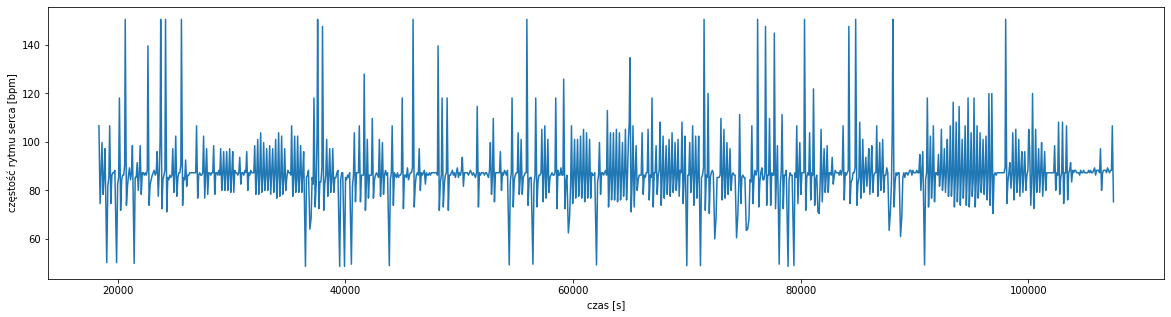

In [ ]:
plt.figure(figsize=(20,5))
y = array[200:1200]
x= qrs[200:1200]
plt.xlabel("czas [s]")
plt.ylabel("częstość rytmu serca [bpm]")
plt.plot(x,y)

In [ ]:
frame = pd.read_csv("826test.csv", delim_whitespace=True )
frame.head(5)

,Time,Sample,#,Type,Sub,Chan,Num,Aux
0,0:00.789,101,N,0,0,0,NaN,NaN
1,0:01.477,189,N,0,0,0,NaN,NaN
2,0:02.164,277,N,0,0,0,NaN,NaN
3,0:02.859,366,N,0,0,0,NaN,NaN
4,0:03.531,452,N,0,0,0,NaN,NaN


In [ ]:
sample = list(frame.Sample)
sample[:5]

[101, 189, 277, 366, 452]

In [ ]:
qrs[:5]

[102, 191, 277, 366, 453]

##$\large{4.\ Wnioski\ końcowe}$ 

1. W ćwiczeniu osiągnięto wyznaczenie 

---

przez algorytm zespołu qrs.

2. Badana częstość rytmu serca została przechwycona, jednocześnie nie można tu mówić o satysfakcjonującym efekcie końcowym w postaci jej dokładnego wyliczenia.
